In [1]:
import torch
import os
import glob

In [2]:
print(torch.cuda.is_available())
#current_device = torch.cuda.current_device()
#print("Current device index:", current_device)
torch.cuda.set_device(1)
print("Using GPU:", torch.cuda.current_device())

True
Using GPU: 1


In [3]:
import os, torch, subprocess, socket

print("‣ CUDA visible  :", torch.cuda.is_available())
print("‣ # of GPUs     :", torch.cuda.device_count())
if torch.cuda.is_available():
    print("‣ Current index :", torch.cuda.current_device())
    print("‣ Device name   :", torch.cuda.get_device_name(0))

print("‣ Hostname      :", socket.gethostname())
print("‣ SLURM node    :", os.environ.get("SLURMD_NODENAME", "not set"))

# Optional: show nvidia‑smi table
try:
    print("\n--- nvidia‑smi ---")
    subprocess.run(["nvidia-smi", "--query-gpu=name,memory.total,memory.used,utilization.gpu",
                    "--format=csv,noheader"], check=True)
except FileNotFoundError:
    print("nvidia‑smi not in PATH (likely not a GPU node)")

‣ CUDA visible  : True
‣ # of GPUs     : 2
‣ Current index : 1
‣ Device name   : NVIDIA L40S
‣ Hostname      : grn019
‣ SLURM node    : not set

--- nvidia‑smi ---
NVIDIA L40S, 46068 MiB, 1447 MiB, 0 %
NVIDIA L40S, 46068 MiB, 433 MiB, 0 %


In [4]:
INPUT_DIR = "/uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction"

In [5]:
TILE_SIZE = 128
OVERLAP = 64
LAYERS = 4
EPOCHS = 350
BATCH_SIZE = 8
AUGMENTATIONS = 8 # all data is augmented, no originalS
WEIGHT_FOCAL=0.7
WEIGHT_DICE=0.3
FOCAL_ALPHA=0.25
FOCAL_GAMMA=3
LEARNING_RATE=1e-5
OUT_PREFIX = f"run_FDL_fa_t{TILE_SIZE}_o{OVERLAP}_l{LAYERS}_b{BATCH_SIZE}_e{EPOCHS}_a{AUGMENTATIONS}"
print("output prefix:", OUT_PREFIX)

output prefix: run_FDL_fa_t128_o64_l4_b8_e350_a8


In [6]:
import configparser

In [7]:
# Create configparser object
config = configparser.ConfigParser()
config["TRAINING"] = {
    "TILE_SIZE": TILE_SIZE,
    "OVERLAP": OVERLAP,
    "LAYERS": LAYERS,
    "EPOCHS": EPOCHS,
    "BATCH_SIZE": BATCH_SIZE,
    "AUGMENTATIONS": AUGMENTATIONS,
    "WEIGHT_FOCAL": WEIGHT_FOCAL,
    "WEIGHT_DICE": WEIGHT_DICE,
    "FOCAL_ALPHA": FOCAL_ALPHA,
    "FOCAL_GAMMA": FOCAL_GAMMA,
    "LEARNING_RATE": LEARNING_RATE,
    "OUT_PREFIX": OUT_PREFIX
}

In [8]:
import run_unet

In [49]:
run_unet.main()

usage: ipykernel_launcher.py [-h] --mode {preprocess,train,predict}
                             [--image_dir IMAGE_DIR] [--label_dir LABEL_DIR]
                             [--output_dir OUTPUT_DIR]
                             [--model_path MODEL_PATH]
                             [--batch_size BATCH_SIZE] [--epochs EPOCHS]
                             [--learning_rate LEARNING_RATE]
                             [--augmentations AUGMENTATIONS]
                             [--weight_dice WEIGHT_DICE]
                             [--weight_focal WEIGHT_FOCAL]
                             [--focal_alpha FOCAL_ALPHA]
                             [--focal_gamma FOCAL_GAMMA]
                             [--tile_size TILE_SIZE]
                             [--unet_layers UNET_LAYERS] [--overlap OVERLAP]
                             [--input_image INPUT_IMAGE]
                             [--output_image OUTPUT_IMAGE]
ipykernel_launcher.py: error: ambiguous option: --f=/uufs/chpc.utah.edu/co

SystemExit: 2

/uufs/chpc.utah.edu/common/home/u1419916/miniconda3/envs/tissue_seg_cu124/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
run_unet.main(["--mode", "preprocess", 
               "--image_dir", INPUT_DIR+"/train_im/", 
              "--label_dir", INPUT_DIR+"/label_im/",
              "--output_dir", INPUT_DIR+f"/tiles_{OUT_PREFIX}/",
               "--tile_size", str(TILE_SIZE),
               "--overlap", str(OVERLAP),
               "--augmentations", str(AUGMENTATIONS)
              ])

Preprocessing data...
looking in directory: /uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction/train_im
found image files:
/uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction/train_im/visus-region1_colim_1024x1024x3.raw
/uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction/train_im/visus-region2_colim_1024x1024x3.raw
/uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction/train_im/visus-region3_colim_3296x3834x3.raw
/uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction/train_im/visus-region4_colim_2008x3270x3.raw
visus-region1_colim_1024x1024x3.raw --> visus-region1_inv_topo_test_mask_1024x1024.raw
visus-region2_colim_1024x1024x3.raw --> visus-region2_inv_topo_test_mask_1024x1024.raw
visus-region3_

In [10]:
# Save to a file
config_filename = INPUT_DIR+f"/tiles_{OUT_PREFIX}/" + f"{OUT_PREFIX}.ini"
with open(config_filename, "w") as configfile:
    config.write(configfile)

print(f"Configuration saved to {config_filename}")

Configuration saved to /uufs/chpc.utah.edu/common/home/u1419916/data/ARPA-H/tissue_boundary/tissue_boundary_dataset/new_reconstruction/tiles_run_FDL_fa_t128_o64_l4_b8_e350_a8/run_FDL_fa_t128_o64_l4_b8_e350_a8.ini


In [ ]:
run_unet.main(["--mode", "train", 
               "--image_dir", INPUT_DIR+"/train_im/", 
              "--label_dir", INPUT_DIR+"/label_im/",
              "--output_dir", INPUT_DIR+f"/tiles_{OUT_PREFIX}/",
               "--tile_size", str(TILE_SIZE),
               "--overlap", str(OVERLAP),
               "--batch_size", str(BATCH_SIZE),
               "--unet_layers", str(LAYERS),
               "--epochs", str(EPOCHS),
               "--augmentations", str(AUGMENTATIONS),
               "--weight_focal", str(WEIGHT_FOCAL),
               "--weight_dice", str(WEIGHT_DICE),
               "--focal_alpha", str(FOCAL_ALPHA),
               "--focal_gamma", str(FOCAL_GAMMA),
               '--learning_rate', str(LEARNING_RATE)
              ])


/uufs/chpc.utah.edu/common/home/u1419916/miniconda3/envs/tissue_seg_cu124/lib/python3.10/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/uufs/chpc.utah.edu/common/home/u1419916/miniconda3/envs/tissue_seg_cu124/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Training UNET model...
Using 4 layer unet
Using device: cuda
Unet layers: 4
Unet4
Epoch 1/350


Train Loss: 0.2775, Val Loss: 0.2754
IoU: 0.0593, F1: 0.1119, AP: 0.0780
Learning Rate: 0.000010
Epoch 2/350


Train Loss: 0.2750, Val Loss: 0.2742
IoU: 0.0725, F1: 0.1353, AP: 0.0883
Learning Rate: 0.000010
Epoch 3/350


Train Loss: 0.2740, Val Loss: 0.2730
IoU: 0.0781, F1: 0.1449, AP: 0.0952
Learning Rate: 0.000010
Epoch 4/350


Train Loss: 0.2733, Val Loss: 0.2721
IoU: 0.0855, F1: 0.1575, AP: 0.1038
Learning Rate: 0.000010
Epoch 5/350


Train Loss: 0.2727, Val Loss: 0.2716
IoU: 0.0837, F1: 0.1544, AP: 0.1046
Learning Rate: 0.000010
Epoch 6/350


Train Loss: 0.2722, Val Loss: 0.2714
IoU: 0.0890, F1: 0.1634, AP: 0.1097
Learning Rate: 0.000010
Epoch 7/350


Train Loss: 0.2717, Val Loss: 0.2703
IoU: 0.0926, F1: 0.1696, AP: 0.1144
Learning Rate: 0.000010
Epoch 8/350


Train Loss: 0.2712, Val Loss: 0.2700
IoU: 0.0952, F1: 0.1738, AP: 0.1158
Learning Rate: 0.000010
Epoch 9/350


Train Loss: 0.2707, Val Loss: 0.2694
IoU: 0.0970, F1: 0.1768, AP: 0.1191
Learning Rate: 0.000010
Epoch 10/350


Train Loss: 0.2703, Val Loss: 0.2687
IoU: 0.0998, F1: 0.1815, AP: 0.1250
Learning Rate: 0.000010
Epoch 11/350


Train Loss: 0.2697, Val Loss: 0.2680
IoU: 0.1036, F1: 0.1877, AP: 0.1281
Learning Rate: 0.000010
Epoch 12/350


Train Loss: 0.2692, Val Loss: 0.2678
IoU: 0.1056, F1: 0.1911, AP: 0.1344
Learning Rate: 0.000010
Epoch 13/350


Train Loss: 0.2686, Val Loss: 0.2670
IoU: 0.1091, F1: 0.1967, AP: 0.1373
Learning Rate: 0.000010
Epoch 14/350


Train Loss: 0.2680, Val Loss: 0.2659
IoU: 0.1106, F1: 0.1992, AP: 0.1385
Learning Rate: 0.000010
Epoch 15/350


Train Loss: 0.2674, Val Loss: 0.2666
IoU: 0.1124, F1: 0.2021, AP: 0.1426
Learning Rate: 0.000010
Epoch 16/350


Train Loss: 0.2667, Val Loss: 0.2668
IoU: 0.1119, F1: 0.2013, AP: 0.1426
Learning Rate: 0.000010
Epoch 17/350


Train Loss: 0.2660, Val Loss: 0.2637
IoU: 0.1203, F1: 0.2148, AP: 0.1567
Learning Rate: 0.000010
Epoch 18/350


Train Loss: 0.2653, Val Loss: 0.2626
IoU: 0.1228, F1: 0.2187, AP: 0.1534
Learning Rate: 0.000010
Epoch 19/350


Train Loss: 0.2646, Val Loss: 0.2631
IoU: 0.1233, F1: 0.2195, AP: 0.1634
Learning Rate: 0.000010
Epoch 20/350


Train Loss: 0.2639, Val Loss: 0.2629
IoU: 0.1259, F1: 0.2236, AP: 0.1718
Learning Rate: 0.000010
Epoch 21/350


Train Loss: 0.2631, Val Loss: 0.2602
IoU: 0.1356, F1: 0.2387, AP: 0.1752
Learning Rate: 0.000010
Epoch 22/350


Train Loss: 0.2624, Val Loss: 0.2593
IoU: 0.1362, F1: 0.2397, AP: 0.1783
Learning Rate: 0.000010
Epoch 23/350


Train Loss: 0.2616, Val Loss: 0.2587
IoU: 0.1376, F1: 0.2419, AP: 0.1810
Learning Rate: 0.000010
Epoch 24/350


Train Loss: 0.2608, Val Loss: 0.2588
IoU: 0.1439, F1: 0.2517, AP: 0.1920
Learning Rate: 0.000010
Epoch 25/350


Train Loss: 0.2601, Val Loss: 0.2565
IoU: 0.1464, F1: 0.2555, AP: 0.1931
Learning Rate: 0.000010
Epoch 26/350


Train Loss: 0.2592, Val Loss: 0.2582
IoU: 0.1470, F1: 0.2563, AP: 0.1954
Learning Rate: 0.000010
Epoch 27/350


Train Loss: 0.2586, Val Loss: 0.2559
IoU: 0.1492, F1: 0.2597, AP: 0.2041
Learning Rate: 0.000010
Epoch 28/350


Train Loss: 0.2577, Val Loss: 0.2543
IoU: 0.1551, F1: 0.2685, AP: 0.2073
Learning Rate: 0.000010
Epoch 29/350


Train Loss: 0.2570, Val Loss: 0.2549
IoU: 0.1556, F1: 0.2693, AP: 0.2102
Learning Rate: 0.000010
Epoch 30/350


Train Loss: 0.2562, Val Loss: 0.2518
IoU: 0.1625, F1: 0.2796, AP: 0.2218
Learning Rate: 0.000010
Epoch 31/350


Train Loss: 0.2553, Val Loss: 0.2521
IoU: 0.1631, F1: 0.2804, AP: 0.2205
Learning Rate: 0.000010
Epoch 32/350


Train Loss: 0.2548, Val Loss: 0.2508
IoU: 0.1680, F1: 0.2876, AP: 0.2272
Learning Rate: 0.000010
Epoch 33/350


Train Loss: 0.2539, Val Loss: 0.2492
IoU: 0.1729, F1: 0.2949, AP: 0.2348
Learning Rate: 0.000010
Epoch 34/350


Train Loss: 0.2533, Val Loss: 0.2517
IoU: 0.1666, F1: 0.2856, AP: 0.2338
Learning Rate: 0.000010
Epoch 35/350


Train Loss: 0.2527, Val Loss: 0.2478
IoU: 0.1751, F1: 0.2980, AP: 0.2435
Learning Rate: 0.000010
Epoch 36/350


Train Loss: 0.2519, Val Loss: 0.2491
IoU: 0.1699, F1: 0.2905, AP: 0.2413
Learning Rate: 0.000010
Epoch 37/350


Train Loss: 0.2514, Val Loss: 0.2463
IoU: 0.1785, F1: 0.3029, AP: 0.2501
Learning Rate: 0.000010
Epoch 38/350


Train Loss: 0.2508, Val Loss: 0.2463
IoU: 0.1805, F1: 0.3058, AP: 0.2513
Learning Rate: 0.000010
Epoch 39/350


Train Loss: 0.2499, Val Loss: 0.2453
IoU: 0.1845, F1: 0.3116, AP: 0.2536
Learning Rate: 0.000010
Epoch 40/350


Train Loss: 0.2495, Val Loss: 0.2429
IoU: 0.1888, F1: 0.3176, AP: 0.2662
Learning Rate: 0.000010
Epoch 41/350


Train Loss: 0.2487, Val Loss: 0.2434
IoU: 0.1915, F1: 0.3215, AP: 0.2633
Learning Rate: 0.000010
Epoch 42/350


Train Loss: 0.2480, Val Loss: 0.2461
IoU: 0.1873, F1: 0.3156, AP: 0.2666
Learning Rate: 0.000010
Epoch 43/350


Train Loss: 0.2478, Val Loss: 0.2424
IoU: 0.1967, F1: 0.3288, AP: 0.2746
Learning Rate: 0.000010
Epoch 44/350


Train Loss: 0.2469, Val Loss: 0.2417
IoU: 0.1932, F1: 0.3238, AP: 0.2784
Learning Rate: 0.000010
Epoch 45/350


Train Loss: 0.2462, Val Loss: 0.2398
IoU: 0.1984, F1: 0.3311, AP: 0.2860
Learning Rate: 0.000010
Epoch 46/350


Train Loss: 0.2456, Val Loss: 0.2403
IoU: 0.1942, F1: 0.3252, AP: 0.2852
Learning Rate: 0.000010
Epoch 47/350


Train Loss: 0.2452, Val Loss: 0.2394
IoU: 0.2048, F1: 0.3400, AP: 0.2850
Learning Rate: 0.000010
Epoch 48/350


Train Loss: 0.2444, Val Loss: 0.2383
IoU: 0.2040, F1: 0.3388, AP: 0.2882
Learning Rate: 0.000010
Epoch 49/350


Train Loss: 0.2441, Val Loss: 0.2381
IoU: 0.2060, F1: 0.3416, AP: 0.2936
Learning Rate: 0.000010
Epoch 50/350


Train Loss: 0.2434, Val Loss: 0.2380
IoU: 0.2091, F1: 0.3458, AP: 0.2991
Learning Rate: 0.000010
Epoch 51/350


Train Loss: 0.2430, Val Loss: 0.2371
IoU: 0.2123, F1: 0.3503, AP: 0.2989
Learning Rate: 0.000010
Epoch 52/350


Train Loss: 0.2421, Val Loss: 0.2356
IoU: 0.2132, F1: 0.3514, AP: 0.3080
Learning Rate: 0.000010
Epoch 53/350


Train Loss: 0.2421, Val Loss: 0.2354
IoU: 0.2134, F1: 0.3518, AP: 0.3072
Learning Rate: 0.000010
Epoch 54/350


Train Loss: 0.2412, Val Loss: 0.2332
IoU: 0.2215, F1: 0.3626, AP: 0.3091
Learning Rate: 0.000010
Epoch 55/350


Train Loss: 0.2406, Val Loss: 0.2357
IoU: 0.2168, F1: 0.3564, AP: 0.3090
Learning Rate: 0.000010
Epoch 56/350


Train Loss: 0.2401, Val Loss: 0.2327
IoU: 0.2257, F1: 0.3683, AP: 0.3165
Learning Rate: 0.000010
Epoch 57/350


Train Loss: 0.2396, Val Loss: 0.2339
IoU: 0.2170, F1: 0.3566, AP: 0.3151
Learning Rate: 0.000010
Epoch 58/350


Train Loss: 0.2390, Val Loss: 0.2322
IoU: 0.2252, F1: 0.3677, AP: 0.3226
Learning Rate: 0.000010
Epoch 59/350


Train Loss: 0.2386, Val Loss: 0.2330
IoU: 0.2207, F1: 0.3616, AP: 0.3224
Learning Rate: 0.000010
Epoch 60/350


Train Loss: 0.2383, Val Loss: 0.2303
IoU: 0.2303, F1: 0.3744, AP: 0.3302
Learning Rate: 0.000010
Epoch 61/350


Train Loss: 0.2376, Val Loss: 0.2307
IoU: 0.2286, F1: 0.3721, AP: 0.3277
Learning Rate: 0.000010
Epoch 62/350


Train Loss: 0.2369, Val Loss: 0.2302
IoU: 0.2289, F1: 0.3725, AP: 0.3318
Learning Rate: 0.000010
Epoch 63/350


Train Loss: 0.2365, Val Loss: 0.2294
IoU: 0.2346, F1: 0.3800, AP: 0.3338
Learning Rate: 0.000010
Epoch 64/350


Train Loss: 0.2360, Val Loss: 0.2299
IoU: 0.2317, F1: 0.3763, AP: 0.3289
Learning Rate: 0.000010
Epoch 65/350


Train Loss: 0.2356, Val Loss: 0.2297
IoU: 0.2325, F1: 0.3773, AP: 0.3318
Learning Rate: 0.000010
Epoch 66/350


Train Loss: 0.2352, Val Loss: 0.2275
IoU: 0.2406, F1: 0.3879, AP: 0.3365
Learning Rate: 0.000010
Epoch 67/350


Train Loss: 0.2344, Val Loss: 0.2278
IoU: 0.2359, F1: 0.3818, AP: 0.3399
Learning Rate: 0.000010
Epoch 68/350


Train Loss: 0.2340, Val Loss: 0.2263
IoU: 0.2466, F1: 0.3956, AP: 0.3470
Learning Rate: 0.000010
Epoch 69/350


Train Loss: 0.2335, Val Loss: 0.2267
IoU: 0.2427, F1: 0.3907, AP: 0.3449
Learning Rate: 0.000010
Epoch 70/350


Train Loss: 0.2332, Val Loss: 0.2259
IoU: 0.2469, F1: 0.3960, AP: 0.3465
Learning Rate: 0.000010
Epoch 71/350


Train Loss: 0.2330, Val Loss: 0.2260
IoU: 0.2505, F1: 0.4007, AP: 0.3535
Learning Rate: 0.000010
Epoch 72/350


Train Loss: 0.2326, Val Loss: 0.2247
IoU: 0.2501, F1: 0.4002, AP: 0.3550
Learning Rate: 0.000010
Epoch 73/350


Train Loss: 0.2319, Val Loss: 0.2244
IoU: 0.2492, F1: 0.3990, AP: 0.3545
Learning Rate: 0.000010
Epoch 74/350


Train Loss: 0.2315, Val Loss: 0.2228
IoU: 0.2534, F1: 0.4044, AP: 0.3605
Learning Rate: 0.000010
Epoch 75/350


Train Loss: 0.2313, Val Loss: 0.2241
IoU: 0.2497, F1: 0.3997, AP: 0.3620
Learning Rate: 0.000010
Epoch 76/350


Train Loss: 0.2307, Val Loss: 0.2232
IoU: 0.2489, F1: 0.3986, AP: 0.3618
Learning Rate: 0.000010
Epoch 77/350


Train Loss: 0.2305, Val Loss: 0.2227
IoU: 0.2528, F1: 0.4035, AP: 0.3651
Learning Rate: 0.000010
Epoch 78/350


Train Loss: 0.2296, Val Loss: 0.2238
IoU: 0.2478, F1: 0.3971, AP: 0.3674
Learning Rate: 0.000010
Epoch 79/350


Train Loss: 0.2293, Val Loss: 0.2213
IoU: 0.2602, F1: 0.4129, AP: 0.3720
Learning Rate: 0.000010
Epoch 80/350


Train Loss: 0.2294, Val Loss: 0.2210
IoU: 0.2588, F1: 0.4111, AP: 0.3730
Learning Rate: 0.000010
Epoch 81/350


Train Loss: 0.2288, Val Loss: 0.2203
IoU: 0.2658, F1: 0.4200, AP: 0.3753
Learning Rate: 0.000010
Epoch 82/350


Train Loss: 0.2286, Val Loss: 0.2210
IoU: 0.2606, F1: 0.4135, AP: 0.3772
Learning Rate: 0.000010
Epoch 83/350


Train Loss: 0.2278, Val Loss: 0.2200
IoU: 0.2625, F1: 0.4158, AP: 0.3766
Learning Rate: 0.000010
Epoch 84/350


Train Loss: 0.2275, Val Loss: 0.2201
IoU: 0.2593, F1: 0.4119, AP: 0.3790
Learning Rate: 0.000010
Epoch 85/350


Train Loss: 0.2272, Val Loss: 0.2201
IoU: 0.2648, F1: 0.4188, AP: 0.3779
Learning Rate: 0.000010
Epoch 86/350


Train Loss: 0.2265, Val Loss: 0.2191
IoU: 0.2716, F1: 0.4272, AP: 0.3872
Learning Rate: 0.000010
Epoch 87/350


Train Loss: 0.2263, Val Loss: 0.2178
IoU: 0.2716, F1: 0.4271, AP: 0.3914
Learning Rate: 0.000010
Epoch 88/350


Train Loss: 0.2263, Val Loss: 0.2184
IoU: 0.2678, F1: 0.4224, AP: 0.3877
Learning Rate: 0.000010
Epoch 89/350


Train Loss: 0.2258, Val Loss: 0.2182
IoU: 0.2656, F1: 0.4197, AP: 0.3919
Learning Rate: 0.000010
Epoch 90/350


Train Loss: 0.2258, Val Loss: 0.2165
IoU: 0.2790, F1: 0.4363, AP: 0.3970
Learning Rate: 0.000010
Epoch 91/350


Train Loss: 0.2251, Val Loss: 0.2163
IoU: 0.2723, F1: 0.4280, AP: 0.3954
Learning Rate: 0.000010
Epoch 92/350


Train Loss: 0.2247, Val Loss: 0.2160
IoU: 0.2784, F1: 0.4356, AP: 0.4003
Learning Rate: 0.000010
Epoch 93/350


Train Loss: 0.2242, Val Loss: 0.2155
IoU: 0.2794, F1: 0.4367, AP: 0.4017
Learning Rate: 0.000010
Epoch 94/350


Train Loss: 0.2240, Val Loss: 0.2157
IoU: 0.2765, F1: 0.4332, AP: 0.4044
Learning Rate: 0.000010
Epoch 95/350


Train Loss: 0.2237, Val Loss: 0.2153
IoU: 0.2809, F1: 0.4386, AP: 0.4067
Learning Rate: 0.000010
Epoch 96/350


Train Loss: 0.2234, Val Loss: 0.2153
IoU: 0.2795, F1: 0.4369, AP: 0.4090
Learning Rate: 0.000010
Epoch 97/350


Train Loss: 0.2230, Val Loss: 0.2145
IoU: 0.2863, F1: 0.4452, AP: 0.4143
Learning Rate: 0.000010
Epoch 98/350


Train Loss: 0.2228, Val Loss: 0.2141
IoU: 0.2788, F1: 0.4360, AP: 0.4167
Learning Rate: 0.000010
Epoch 99/350


Train Loss: 0.2224, Val Loss: 0.2122
IoU: 0.2902, F1: 0.4498, AP: 0.4239
Learning Rate: 0.000010
Epoch 100/350


Train Loss: 0.2222, Val Loss: 0.2123
IoU: 0.2940, F1: 0.4544, AP: 0.4215
Learning Rate: 0.000010
Epoch 101/350


Train Loss: 0.2219, Val Loss: 0.2117
IoU: 0.2922, F1: 0.4523, AP: 0.4222
Learning Rate: 0.000010
Epoch 102/350


Train Loss: 0.2214, Val Loss: 0.2120
IoU: 0.2897, F1: 0.4492, AP: 0.4202
Learning Rate: 0.000010
Epoch 103/350


Train Loss: 0.2212, Val Loss: 0.2127
IoU: 0.2927, F1: 0.4529, AP: 0.4224
Learning Rate: 0.000010
Epoch 104/350


Train Loss: 0.2211, Val Loss: 0.2115
IoU: 0.2914, F1: 0.4512, AP: 0.4257
Learning Rate: 0.000010
Epoch 105/350


Train Loss: 0.2208, Val Loss: 0.2105
IoU: 0.2941, F1: 0.4546, AP: 0.4277
Learning Rate: 0.000010
Epoch 106/350


Train Loss: 0.2205, Val Loss: 0.2113
IoU: 0.2933, F1: 0.4536, AP: 0.4231
Learning Rate: 0.000010
Epoch 107/350


Train Loss: 0.2200, Val Loss: 0.2098
IoU: 0.2981, F1: 0.4593, AP: 0.4350
Learning Rate: 0.000010
Epoch 108/350


Train Loss: 0.2198, Val Loss: 0.2099
IoU: 0.2980, F1: 0.4592, AP: 0.4331
Learning Rate: 0.000010
Epoch 109/350


Train Loss: 0.2198, Val Loss: 0.2102
IoU: 0.2956, F1: 0.4563, AP: 0.4352
Learning Rate: 0.000010
Epoch 110/350


Train Loss: 0.2193, Val Loss: 0.2093
IoU: 0.3000, F1: 0.4615, AP: 0.4374
Learning Rate: 0.000010
Epoch 111/350


Train Loss: 0.2191, Val Loss: 0.2079
IoU: 0.3076, F1: 0.4705, AP: 0.4438
Learning Rate: 0.000010
Epoch 112/350


Train Loss: 0.2186, Val Loss: 0.2084
IoU: 0.3019, F1: 0.4637, AP: 0.4433
Learning Rate: 0.000010
Epoch 113/350


Train Loss: 0.2185, Val Loss: 0.2076
IoU: 0.3038, F1: 0.4661, AP: 0.4451
Learning Rate: 0.000010
Epoch 114/350


Train Loss: 0.2186, Val Loss: 0.2084
IoU: 0.3027, F1: 0.4647, AP: 0.4429
Learning Rate: 0.000010
Epoch 115/350


Train Loss: 0.2177, Val Loss: 0.2090
IoU: 0.3074, F1: 0.4702, AP: 0.4405
Learning Rate: 0.000010
Epoch 116/350


Train Loss: 0.2176, Val Loss: 0.2093
IoU: 0.3072, F1: 0.4701, AP: 0.4438
Learning Rate: 0.000010
Epoch 117/350


Train Loss: 0.2174, Val Loss: 0.2069
IoU: 0.3063, F1: 0.4690, AP: 0.4509
Learning Rate: 0.000010
Epoch 118/350


Train Loss: 0.2175, Val Loss: 0.2068
IoU: 0.3118, F1: 0.4753, AP: 0.4514
Learning Rate: 0.000010
Epoch 119/350


Train Loss: 0.2171, Val Loss: 0.2058
IoU: 0.3132, F1: 0.4769, AP: 0.4504
Learning Rate: 0.000010
Epoch 120/350


Train Loss: 0.2165, Val Loss: 0.2062
IoU: 0.3127, F1: 0.4765, AP: 0.4523
Learning Rate: 0.000010
Epoch 121/350


Train Loss: 0.2164, Val Loss: 0.2057
IoU: 0.3096, F1: 0.4728, AP: 0.4563
Learning Rate: 0.000010
Epoch 122/350


Train Loss: 0.2162, Val Loss: 0.2063
IoU: 0.3089, F1: 0.4720, AP: 0.4544
Learning Rate: 0.000010
Epoch 123/350


Train Loss: 0.2160, Val Loss: 0.2059
IoU: 0.3130, F1: 0.4767, AP: 0.4531
Learning Rate: 0.000010
Epoch 124/350


Train Loss: 0.2160, Val Loss: 0.2042
IoU: 0.3159, F1: 0.4802, AP: 0.4614
Learning Rate: 0.000010
Epoch 125/350


Train Loss: 0.2156, Val Loss: 0.2045
IoU: 0.3110, F1: 0.4744, AP: 0.4616
Learning Rate: 0.000010
Epoch 126/350


Train Loss: 0.2154, Val Loss: 0.2059
IoU: 0.3061, F1: 0.4688, AP: 0.4598
Learning Rate: 0.000010
Epoch 127/350


Train Loss: 0.2153, Val Loss: 0.2033
IoU: 0.3186, F1: 0.4832, AP: 0.4664
Learning Rate: 0.000010
Epoch 128/350


Train Loss: 0.2151, Val Loss: 0.2045
IoU: 0.3104, F1: 0.4737, AP: 0.4646
Learning Rate: 0.000010
Epoch 129/350


Train Loss: 0.2148, Val Loss: 0.2045
IoU: 0.3131, F1: 0.4769, AP: 0.4661
Learning Rate: 0.000010
Epoch 130/350


Train Loss: 0.2142, Val Loss: 0.2059
IoU: 0.3094, F1: 0.4725, AP: 0.4607
Learning Rate: 0.000010
Epoch 131/350


Train Loss: 0.2142, Val Loss: 0.2024
IoU: 0.3216, F1: 0.4867, AP: 0.4725
Learning Rate: 0.000010
Epoch 132/350


Train Loss: 0.2137, Val Loss: 0.2026
IoU: 0.3238, F1: 0.4892, AP: 0.4749
Learning Rate: 0.000010
Epoch 133/350


Train Loss: 0.2140, Val Loss: 0.2022
IoU: 0.3247, F1: 0.4902, AP: 0.4741
Learning Rate: 0.000010
Epoch 134/350


Train Loss: 0.2136, Val Loss: 0.2023
IoU: 0.3251, F1: 0.4907, AP: 0.4772
Learning Rate: 0.000010
Epoch 135/350


Train Loss: 0.2133, Val Loss: 0.2031
IoU: 0.3196, F1: 0.4844, AP: 0.4739
Learning Rate: 0.000010
Epoch 136/350


Train Loss: 0.2131, Val Loss: 0.2017
IoU: 0.3260, F1: 0.4917, AP: 0.4767
Learning Rate: 0.000010
Epoch 137/350


Train Loss: 0.2128, Val Loss: 0.2012
IoU: 0.3260, F1: 0.4917, AP: 0.4795
Learning Rate: 0.000010
Epoch 138/350


Train Loss: 0.2127, Val Loss: 0.2011
IoU: 0.3252, F1: 0.4907, AP: 0.4864
Learning Rate: 0.000010
Epoch 139/350


Train Loss: 0.2123, Val Loss: 0.2012
IoU: 0.3301, F1: 0.4964, AP: 0.4790
Learning Rate: 0.000010
Epoch 140/350


Train Loss: 0.2125, Val Loss: 0.2014
IoU: 0.3275, F1: 0.4934, AP: 0.4815
Learning Rate: 0.000010
Epoch 141/350


Train Loss: 0.2121, Val Loss: 0.2016
IoU: 0.3273, F1: 0.4932, AP: 0.4743
Learning Rate: 0.000010
Epoch 142/350


Train Loss: 0.2116, Val Loss: 0.2001
IoU: 0.3312, F1: 0.4976, AP: 0.4858
Learning Rate: 0.000010
Epoch 143/350


Train Loss: 0.2119, Val Loss: 0.1996
IoU: 0.3315, F1: 0.4980, AP: 0.4859
Learning Rate: 0.000010
Epoch 144/350


Train Loss: 0.2113, Val Loss: 0.1993
IoU: 0.3371, F1: 0.5042, AP: 0.4910
Learning Rate: 0.000010
Epoch 145/350


Train Loss: 0.2111, Val Loss: 0.1994
IoU: 0.3339, F1: 0.5006, AP: 0.4862
Learning Rate: 0.000010
Epoch 146/350


Train Loss: 0.2108, Val Loss: 0.1996
IoU: 0.3375, F1: 0.5047, AP: 0.4915
Learning Rate: 0.000010
Epoch 147/350


Train Loss: 0.2107, Val Loss: 0.1992
IoU: 0.3328, F1: 0.4994, AP: 0.4904
Learning Rate: 0.000010
Epoch 148/350


Train Loss: 0.2106, Val Loss: 0.1988
IoU: 0.3362, F1: 0.5033, AP: 0.4966
Learning Rate: 0.000010
Epoch 149/350


Train Loss: 0.2103, Val Loss: 0.1983
IoU: 0.3413, F1: 0.5089, AP: 0.4966
Learning Rate: 0.000010
Epoch 150/350


Train Loss: 0.2105, Val Loss: 0.1988
IoU: 0.3394, F1: 0.5068, AP: 0.4950
Learning Rate: 0.000010
Epoch 151/350


Train Loss: 0.2103, Val Loss: 0.1986
IoU: 0.3314, F1: 0.4979, AP: 0.4931
Learning Rate: 0.000010
Epoch 152/350


Train Loss: 0.2099, Val Loss: 0.1974
IoU: 0.3400, F1: 0.5075, AP: 0.5006
Learning Rate: 0.000010
Epoch 153/350


Train Loss: 0.2098, Val Loss: 0.1976
IoU: 0.3413, F1: 0.5089, AP: 0.5015
Learning Rate: 0.000010
Epoch 154/350


Train Loss: 0.2093, Val Loss: 0.1973
IoU: 0.3399, F1: 0.5073, AP: 0.4992
Learning Rate: 0.000010
Epoch 155/350


Train Loss: 0.2093, Val Loss: 0.1980
IoU: 0.3338, F1: 0.5005, AP: 0.5034
Learning Rate: 0.000010
Epoch 156/350


Train Loss: 0.2090, Val Loss: 0.1975
IoU: 0.3426, F1: 0.5104, AP: 0.5034
Learning Rate: 0.000010
Epoch 157/350


Train Loss: 0.2089, Val Loss: 0.1969
IoU: 0.3394, F1: 0.5068, AP: 0.5015
Learning Rate: 0.000010
Epoch 158/350


Train Loss: 0.2089, Val Loss: 0.1975
IoU: 0.3444, F1: 0.5123, AP: 0.5043
Learning Rate: 0.000010
Epoch 159/350


Train Loss: 0.2087, Val Loss: 0.1983
IoU: 0.3330, F1: 0.4996, AP: 0.5065
Learning Rate: 0.000010
Epoch 160/350


Train Loss: 0.2086, Val Loss: 0.1968
IoU: 0.3409, F1: 0.5084, AP: 0.5022
Learning Rate: 0.000010
Epoch 161/350


Train Loss: 0.2082, Val Loss: 0.1960
IoU: 0.3461, F1: 0.5142, AP: 0.5110
Learning Rate: 0.000010
Epoch 162/350


Train Loss: 0.2083, Val Loss: 0.1958
IoU: 0.3429, F1: 0.5107, AP: 0.5089
Learning Rate: 0.000010
Epoch 163/350


Train Loss: 0.2083, Val Loss: 0.1964
IoU: 0.3488, F1: 0.5172, AP: 0.5089
Learning Rate: 0.000010
Epoch 164/350


Train Loss: 0.2079, Val Loss: 0.1959
IoU: 0.3406, F1: 0.5081, AP: 0.5109
Learning Rate: 0.000010
Epoch 165/350


Train Loss: 0.2076, Val Loss: 0.1962
IoU: 0.3442, F1: 0.5122, AP: 0.5103
Learning Rate: 0.000010
Epoch 166/350


Train Loss: 0.2070, Val Loss: 0.1956
IoU: 0.3421, F1: 0.5098, AP: 0.5108
Learning Rate: 0.000010
Epoch 167/350


Train Loss: 0.2074, Val Loss: 0.1953
IoU: 0.3398, F1: 0.5072, AP: 0.5185
Learning Rate: 0.000010
Epoch 168/350


Train Loss: 0.2073, Val Loss: 0.1954
IoU: 0.3501, F1: 0.5186, AP: 0.5103
Learning Rate: 0.000010
Epoch 169/350


Train Loss: 0.2068, Val Loss: 0.1960
IoU: 0.3437, F1: 0.5116, AP: 0.5150
Learning Rate: 0.000010
Epoch 170/350


Train Loss: 0.2068, Val Loss: 0.1955
IoU: 0.3384, F1: 0.5057, AP: 0.5194
Learning Rate: 0.000010
Epoch 171/350


Train Loss: 0.2067, Val Loss: 0.1949
IoU: 0.3495, F1: 0.5180, AP: 0.5196
Learning Rate: 0.000010
Epoch 172/350


Train Loss: 0.2066, Val Loss: 0.1940
IoU: 0.3476, F1: 0.5159, AP: 0.5218
Learning Rate: 0.000010
Epoch 173/350


Train Loss: 0.2065, Val Loss: 0.1938
IoU: 0.3467, F1: 0.5149, AP: 0.5203
Learning Rate: 0.000010
Epoch 174/350


Train Loss: 0.2064, Val Loss: 0.1940
IoU: 0.3563, F1: 0.5254, AP: 0.5222
Learning Rate: 0.000010
Epoch 175/350


Train Loss: 0.2062, Val Loss: 0.1946
IoU: 0.3454, F1: 0.5134, AP: 0.5211
Learning Rate: 0.000010
Epoch 176/350


Train Loss: 0.2064, Val Loss: 0.1942
IoU: 0.3519, F1: 0.5206, AP: 0.5253
Learning Rate: 0.000010
Epoch 177/350


Train Loss: 0.2058, Val Loss: 0.1940
IoU: 0.3513, F1: 0.5200, AP: 0.5226
Learning Rate: 0.000010
Epoch 178/350


Train Loss: 0.2057, Val Loss: 0.1931
IoU: 0.3542, F1: 0.5231, AP: 0.5270
Learning Rate: 0.000010
Epoch 179/350


Train Loss: 0.2054, Val Loss: 0.1929
IoU: 0.3501, F1: 0.5186, AP: 0.5287
Learning Rate: 0.000010
Epoch 180/350


Train Loss: 0.2054, Val Loss: 0.1932
IoU: 0.3504, F1: 0.5189, AP: 0.5251
Learning Rate: 0.000010
Epoch 181/350


Train Loss: 0.2051, Val Loss: 0.1926
IoU: 0.3629, F1: 0.5325, AP: 0.5293
Learning Rate: 0.000010
Epoch 182/350


Train Loss: 0.2051, Val Loss: 0.1933
IoU: 0.3514, F1: 0.5200, AP: 0.5252
Learning Rate: 0.000010
Epoch 183/350


Train Loss: 0.2050, Val Loss: 0.1942
IoU: 0.3439, F1: 0.5118, AP: 0.5275
Learning Rate: 0.000010
Epoch 184/350


Train Loss: 0.2048, Val Loss: 0.1932
IoU: 0.3593, F1: 0.5286, AP: 0.5301
Learning Rate: 0.000010
Epoch 185/350


Train Loss: 0.2047, Val Loss: 0.1922
IoU: 0.3622, F1: 0.5318, AP: 0.5332
Learning Rate: 0.000010
Epoch 186/350


Train Loss: 0.2046, Val Loss: 0.1927
IoU: 0.3573, F1: 0.5265, AP: 0.5330
Learning Rate: 0.000010
Epoch 187/350


Train Loss: 0.2043, Val Loss: 0.1926
IoU: 0.3610, F1: 0.5305, AP: 0.5349
Learning Rate: 0.000010
Epoch 188/350


Train Loss: 0.2038, Val Loss: 0.1917
IoU: 0.3627, F1: 0.5323, AP: 0.5352
Learning Rate: 0.000010
Epoch 189/350


Train Loss: 0.2039, Val Loss: 0.1932
IoU: 0.3538, F1: 0.5227, AP: 0.5303
Learning Rate: 0.000010
Epoch 190/350


Train Loss: 0.2038, Val Loss: 0.1925
IoU: 0.3480, F1: 0.5164, AP: 0.5340
Learning Rate: 0.000010
Epoch 191/350


Train Loss: 0.2035, Val Loss: 0.1915
IoU: 0.3633, F1: 0.5330, AP: 0.5356
Learning Rate: 0.000010
Epoch 192/350


Train Loss: 0.2033, Val Loss: 0.1910
IoU: 0.3595, F1: 0.5289, AP: 0.5408
Learning Rate: 0.000010
Epoch 193/350


Train Loss: 0.2033, Val Loss: 0.1912
IoU: 0.3599, F1: 0.5293, AP: 0.5403
Learning Rate: 0.000010
Epoch 194/350


Train Loss: 0.2031, Val Loss: 0.1919
IoU: 0.3647, F1: 0.5345, AP: 0.5366
Learning Rate: 0.000010
Epoch 195/350


Train Loss: 0.2031, Val Loss: 0.1911
IoU: 0.3579, F1: 0.5272, AP: 0.5400
Learning Rate: 0.000010
Epoch 196/350


Train Loss: 0.2031, Val Loss: 0.1915
IoU: 0.3563, F1: 0.5254, AP: 0.5418
Learning Rate: 0.000010
Epoch 197/350


Train Loss: 0.2031, Val Loss: 0.1907
IoU: 0.3619, F1: 0.5315, AP: 0.5404
Learning Rate: 0.000010
Epoch 198/350


Train Loss: 0.2024, Val Loss: 0.1915
IoU: 0.3535, F1: 0.5224, AP: 0.5418
Learning Rate: 0.000010
Epoch 199/350


Train Loss: 0.2024, Val Loss: 0.1913
IoU: 0.3625, F1: 0.5321, AP: 0.5417
Learning Rate: 0.000010
Epoch 200/350


Train Loss: 0.2025, Val Loss: 0.1906
IoU: 0.3558, F1: 0.5248, AP: 0.5424
Learning Rate: 0.000010
Epoch 201/350


Train Loss: 0.2023, Val Loss: 0.1900
IoU: 0.3639, F1: 0.5336, AP: 0.5461
Learning Rate: 0.000010
Epoch 202/350


Train Loss: 0.2024, Val Loss: 0.1909
IoU: 0.3671, F1: 0.5370, AP: 0.5393
Learning Rate: 0.000010
Epoch 203/350


Train Loss: 0.2020, Val Loss: 0.1910
IoU: 0.3722, F1: 0.5425, AP: 0.5445
Learning Rate: 0.000010
Epoch 204/350


Train Loss: 0.2021, Val Loss: 0.1903
IoU: 0.3672, F1: 0.5372, AP: 0.5439
Learning Rate: 0.000010
Epoch 205/350


Train Loss: 0.2020, Val Loss: 0.1912
IoU: 0.3547, F1: 0.5236, AP: 0.5453
Learning Rate: 0.000010
Epoch 206/350


Train Loss: 0.2019, Val Loss: 0.1910
IoU: 0.3583, F1: 0.5275, AP: 0.5514
Learning Rate: 0.000010
Epoch 207/350


Train Loss: 0.2017, Val Loss: 0.1895
IoU: 0.3686, F1: 0.5386, AP: 0.5488
Learning Rate: 0.000010
Epoch 208/350


Train Loss: 0.2017, Val Loss: 0.1891
IoU: 0.3723, F1: 0.5426, AP: 0.5491
Learning Rate: 0.000010
Epoch 209/350


Train Loss: 0.2016, Val Loss: 0.1884
IoU: 0.3730, F1: 0.5433, AP: 0.5553
Learning Rate: 0.000010
Epoch 210/350


Train Loss: 0.2012, Val Loss: 0.1893
IoU: 0.3663, F1: 0.5362, AP: 0.5532
Learning Rate: 0.000010
Epoch 211/350


Train Loss: 0.2010, Val Loss: 0.1884
IoU: 0.3749, F1: 0.5454, AP: 0.5532
Learning Rate: 0.000010
Epoch 212/350


Train Loss: 0.2010, Val Loss: 0.1894
IoU: 0.3702, F1: 0.5403, AP: 0.5529
Learning Rate: 0.000010
Epoch 213/350


Train Loss: 0.2009, Val Loss: 0.1896
IoU: 0.3659, F1: 0.5357, AP: 0.5492
Learning Rate: 0.000010
Epoch 214/350


Training:  33%|███▎      | 1388/4212 [00:17<00:33, 83.95it/s, loss=0.2009]

In [ ]:

MODEL_PATH = INPUT_DIR + f"/tiles_{OUT_PREFIX}/models/best_model.pth"
print("model found:", os.path.isfile(MODEL_PATH))

In [ ]:
TEST_LIST = glob.glob(INPUT_DIR + "/test/*.tiff")
TEST_LIST = [x for x in TEST_LIST if "pred" not in x]
PRED_LIST = [os.path.splitext(f)[0]+f"_{OUT_PREFIX}_pred.tiff" for f in TEST_LIST]
print(TEST_LIST)

In [ ]:
for t, p in zip(TEST_LIST, PRED_LIST):
    run_unet.main(["--mode", "predict", 
                   "--input_image", t, 
                  "--output_image", p,
                   "--model_path", MODEL_PATH,
                  "--output_dir", INPUT_DIR+f"/tiles_{OUT_PREFIX}/",
                    "--tile_size", str(TILE_SIZE),
                    "--overlap", str(TILE_SIZE//2),
                   "--batch_size", str(BATCH_SIZE),
                   "--unet_layers", str(LAYERS),
                   "--epochs", str(EPOCHS),
                  
                  ])

In [ ]:
import re
#make epochs to video
target_image = '/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/test/visus-region7.tiff'
target_dir = '/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/train_movies/visus-region7_' + OUT_PREFIX
os.makedirs(target_dir, exist_ok=True)

In [ ]:
def get_sorted_models(folder):
    """Find and sort model_epoch_#.pth files numerically."""
    model_files = []
    pattern = re.compile(r"model_epoch_(\d+)\.pth")

    for file in os.listdir(folder):
        match = pattern.match(file)
        if match:
            model_files.append((int(match.group(1)), file))

    return sorted(model_files, key=lambda x: x[0])
model_list = get_sorted_models(INPUT_DIR+f"/tiles_{OUT_PREFIX}/models/")
print("found models:", model_list)

In [ ]:
epoch_im_list = []
print("predicting images for varying models:")
for m in model_list:
    t = target_image
    p = target_dir + "/pred_epochs_" + str(m[0]) + ".tiff"
    run_unet.main(["--mode", "predict", 
                   "--input_image", t, 
                  "--output_image", p,
                   "--model_path", INPUT_DIR+f"/tiles_{OUT_PREFIX}/models/{m[1]}",
                    "--tile_size", str(TILE_SIZE),
                    "--overlap", str(OVERLAP),
                   "--batch_size", str(BATCH_SIZE),
                   "--unet_layers", str(LAYERS),
                  ])
    epoch_im_list.append((t, p, m[0]))
print("done, happy downloading!")

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
from PIL import Image
import json
import image_tiling_utility as itu

In [35]:
# lab = "/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/label_im/visus-region9_inv_topo_test_mask_2008x3270.raw"
# la = np.flipud(itu.load_raw_image(lab))
# la.tofile(lab)

(2008, 3270, 1)
(2008, 3270, 3)


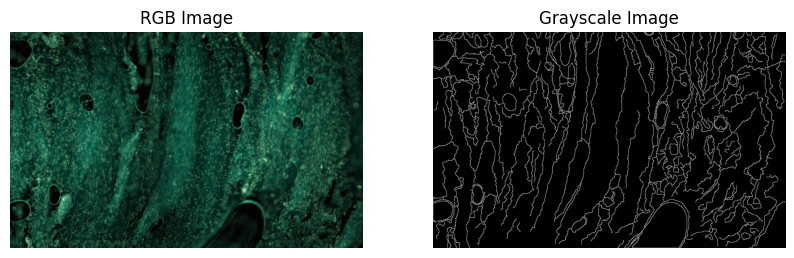

In [30]:
lab = "/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/label_im/visus-region9_inv_topo_test_mask_2008x3270.raw"
tes = "/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/train_im/visus-region9_colim_2008x3270x3.raw"
print(itu.parse_filename(lab))
print(itu.parse_filename(tes))
im = itu.load_raw_image(tes)
la = itu.load_raw_image(lab)
# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show the images
axes[0].imshow(PIL.Image.fromarray((im * 255).astype(np.uint8)))
axes[0].set_title("RGB Image")
axes[0].axis("off")

axes[1].imshow(la, cmap="gray")
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

plt.show()

In [30]:
# lab = "/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/label_im/exclude/visus-region12_inv_topo_test_mask_1612x1954.raw"
# la = np.flipud(itu.load_raw_image(lab))
# la.tofile(lab)

(1612, 1954, 1)
(1612, 1954, 3)


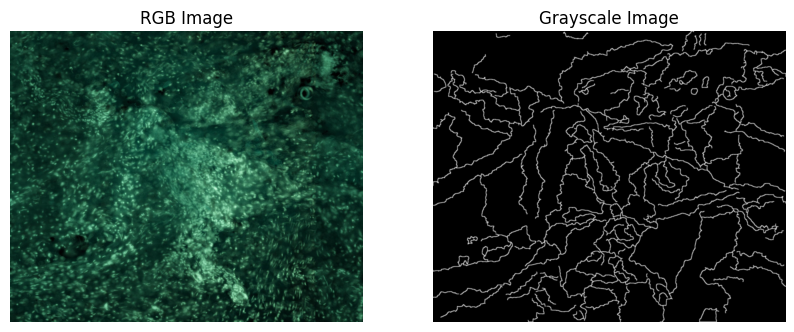

In [31]:
lab = "/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/label_im/exclude/visus-region12_inv_topo_test_mask_1612x1954.raw"
tes = "/uufs/chpc.utah.edu/common/home/u0656168/arpa_data/train_im/exclude/visus-region12_colim_1612x1954x3.raw"
print(itu.parse_filename(lab))
print(itu.parse_filename(tes))
im = itu.load_raw_image(tes)
la = itu.load_raw_image(lab)
# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show the images
axes[0].imshow(PIL.Image.fromarray((im * 255).astype(np.uint8)))
axes[0].set_title("RGB Image")
axes[0].axis("off")

axes[1].imshow(la, cmap="gray")
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

plt.show()

In [ ]:
from collections import OrderedDict

In [ ]:
MODEL_PATH = INPUT_DIR + "/tils256/models/best_model.pth"

In [ ]:
model = run_unet.UNet4(n_channels=3, n_classes=1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=False)

In [ ]:
# Get the model's state dictionary
model_state_dict = model.state_dict()

In [ ]:
# Convert tensor values to lists for JSON serialization
model_state_dict_list = OrderedDict({k: v.cpu().tolist() for k, v in model_state_dict.items()})

In [ ]:
# Serialize the state dictionary to JSON
model_weights_json = json.dumps(model_state_dict_list, indent=4)

In [ ]:
model_weights_json.size()

In [ ]:
# Save the JSON string to a file
with open("model_weights.json", "w") as json_file:
    json_file.write(model_weights_json)